In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
url='S02-hw-dataset.csv'
df=pd.read_csv(url)
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [214]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [215]:
print("Доля пропусков в каждом столбце:")
for column in df.columns:
    print(column,df[column].isna().mean())

Доля пропусков в каждом столбце:
user_id 0.0
age 0.04878048780487805
country 0.0
purchases 0.0
revenue 0.0


In [216]:
number_of_dupl=df.duplicated().sum()
print("Количество дублированных строк: ",number_of_dupl)

Количество дублированных строк:  1


In [217]:
for index,row in df.iterrows():
    problems=[]
    if(math.isnan(row["age"]) or row["age"]<=0 or row["age"]>100):
        problems.append("некорректный возраст")
    if(row["purchases"]<0 or row["revenue"]<0):
        problems.append("отрицательное колличество покупок или доход")
    if(df["user_id"].duplicated()[index]):
        problems.append("id уже используется в другой строке")
    if len(problems)!=0:
        print(index," строка содержит подозрительные данные: ",(",").join(problems))
        print(row)

4  строка содержит подозрительные данные:  некорректный возраст
user_id         5
age           NaN
country        DE
purchases       6
revenue      1296
Name: 4, dtype: object
5  строка содержит подозрительные данные:  некорректный возраст,отрицательное колличество покупок или доход
user_id          6
age          120.0
country         FR
purchases       -1
revenue        785
Name: 5, dtype: object
12  строка содержит подозрительные данные:  некорректный возраст
user_id       13
age          NaN
country       US
purchases      9
revenue      630
Name: 12, dtype: object
40  строка содержит подозрительные данные:  id уже используется в другой строке
user_id        10
age          24.0
country        RU
purchases       7
revenue       511
Name: 40, dtype: object


In [ ]:
Полнота данных нарушена, так как у некотрых строк отсутствует знаение "age".
Уникальность нарушена, так как у 2 строк есть одинаковый "user_id".
Валидность нарушена, так как некоторые строки имеют отрицательные значения там, где они не допустимы.
Целостность, актуальность и точность не нарушены.

In [218]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [219]:
# Группируем по странам
group=df.groupby('country')
group.count()

,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,6,5,6,6
FR,12,12,12,12
RU,13,13,13,13
US,8,7,8,8


In [220]:
# Среднее значение дохода в странах
group["revenue"].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [221]:
# Среднее количество покупок в странах
group["purchases"].mean()

country
CN    4.500000
DE    6.500000
FR    4.250000
RU    4.769231
US    4.625000
Name: purchases, dtype: float64

In [ ]:
Самое большое количество пользователей из России и Франции, а наименьшее из Китая.
Средний доход между разных стран значительно отличается, а среднее количество покупок нет.
На полученные значения могли повлиять некорректные значения количества покупок и дохода,
а также не достаточное количество пользователей из отдельных стран(например из Китая всего 2).

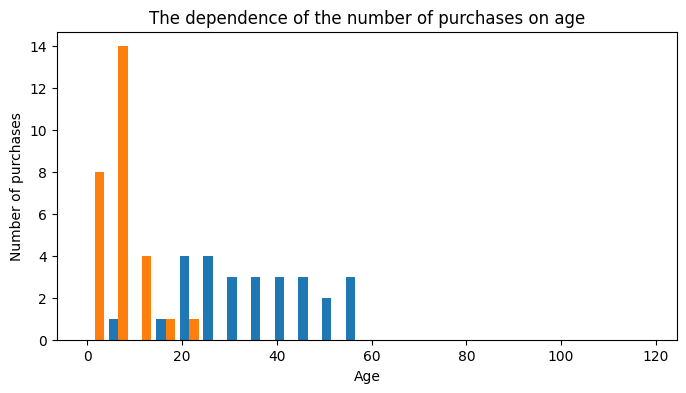

In [260]:
data=df['age'].unique()
data.sort()
data=data[:-1]
data = np.column_stack((data,df.dropna().groupby('age')['purchases'].sum().to_numpy()))
fig, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
ax1.hist( # строим второй график - гистограмму
    data, bins=np.arange(data.min(), data.max(),5), # задаем данные и диапазоны
    label=('x', 'y') # и подписи данных
)
ax1.set_title("The dependence of the number of purchases on age")
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of purchases")
plt.show()

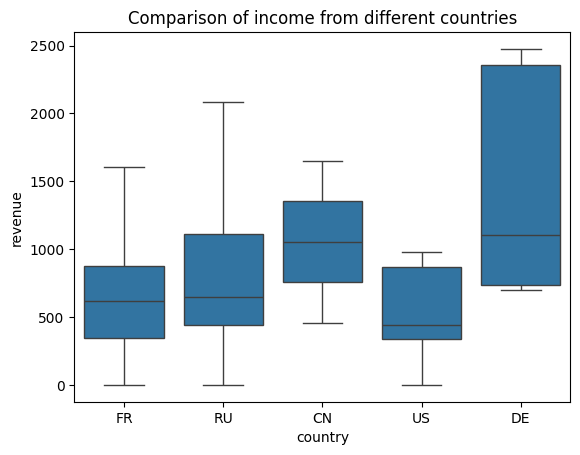

In [313]:
import seaborn as sns
sns.boxplot(x="country",y="revenue", data=df)
plt.title("Comparison of income from different countries")
plt.savefig("./figures/boxplot.png")

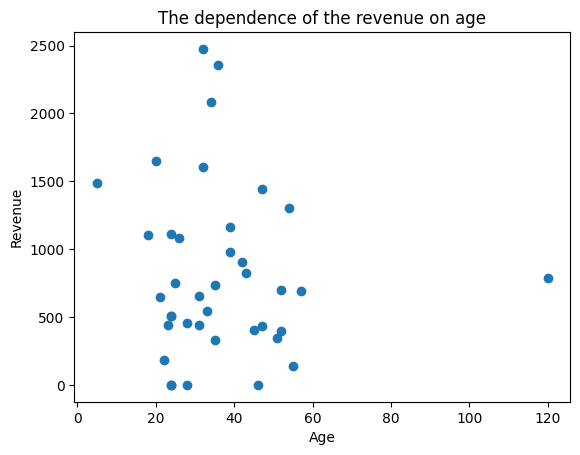

In [324]:
plt.scatter(x=df['age'],y=df['revenue'],label=("Age","Revenue"))
plt.title("The dependence of the revenue on age")
plt.xlabel("Age")
plt.ylabel("Revenue")
plt.savefig("./figures/scatter_plot.png")